<b>Python Image Library : PILLOW </b><br>
Basics <br>
EE393 | Python for Engineers <br>

In [11]:
#Basic use
#open an image and show it!!
#----------------
from PIL import Image
try:
    img = Image.open('ozu2.png')
    print (img)
    img.show()
except FileNotFoundError:
    print ("File not found")

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=1200x500 at 0x7FFA1B76A400>


In [26]:
#image attributes
def printImageAttributes(imageObject, imagePath):
    # Retrieve the attributes of the image
    fileFormat      = imageObject.format        # Format of the image
    imageSize       = imageObject.size          # Size of the image - tupe of (width, height)
    imageMode       = imageObject.mode          # Mode of the image
    colorPalette    = imageObject.palette       # Palette used in the image
    width           = imageObject.width         # image width
    height          = imageObject.height        # image height
    filename        = imageObject.filename      # image file name
    desc            = imageObject.format_description
# Print the attributes of the image

    print("Attributes of image:{0}".format(imagePath))
    print("The file format of the image is:{0}".format(fileFormat))
    print("Format description:", desc)
    print("The mode of the image is:{0}".format(imageMode))
    print("The size of the image is:width {0} pixels,height {1} pixels"
          .format(imageSize[0],imageSize[1]))
    print("Color palette used in image:{0}".format(colorPalette))
    print("Image width:", width)
    print("Image height:", height)
    print("Image file name:", filename)
    print("Keys from image.info dictionary:")
    for key, value in imageObject.info.items() :
        print(key)

In [27]:
imagePath       = "./ozu.jpg"
try:
    image       = Image.open(imagePath)
    image.show()
    printImageAttributes(image, imagePath)
except FileNotFoundError:
    print ("File {0} not found".format(imagePath))
image.save('ozu_new.jpg')

Attributes of image:./ozu.jpg
The file format of the image is:JPEG
Format description: JPEG (ISO 10918)
The mode of the image is:RGB
The size of the image is:width 900 pixels,height 505 pixels
Color palette used in image:None
Image width: 900
Image height: 505
Image file name: ./ozu.jpg
Keys from image.info dictionary:
exif
dpi
photoshop
adobe
adobe_transform
icc_profile


In [28]:
#create new image
from PIL import Image, ImageDraw, ImageFont
mymode="RGBA"
mysize=(50,50)
mycolor=(50,20,20,50) #r,g,b,a values
img = Image.new(mode=mymode, size=mysize, color=mycolor)
fnt = ImageFont.truetype("./Ellanor.ttf", 24)
d = ImageDraw.Draw(img)
d.text((3,0), "Ö z Ü", font=fnt, fill=(255,0,0))
img.save("new.png")

In [33]:
#create new image, work on pixels
#using getpixel and putpixel
from PIL import Image, ImageDraw, ImageFont, ImageColor
im = Image.new("RGBA", (100, 100))
print (im.getpixel((0, 0)))
for x in range(100):
    for y in range(50):
        im.putpixel((x, y), (210, 210, 210))

for x in range(100):
    for y in range(50, 100):
        im.putpixel((x, y), ImageColor.getcolor('darkgray', 'RGBA'))

print (im.getpixel((0, 0)))
print (im.getpixel((0, 50)))
im.save('putPixel.png')

(0, 0, 0, 0)
(210, 210, 210, 255)
(169, 169, 169, 255)


In [ ]:
#getting pixel color values as tuples
pix = img.load()
for i in range(img.width): # for every pixel:
    for j in range(img.height):
        print (i,j,":",pix[i,j])

In [12]:
#image color manipulation!!!
from PIL import Image, ImageDraw, ImageFont

def processImg(img):
    fnt = ImageFont.truetype("./Arial.ttf", 96)
    d = ImageDraw.Draw(img)
    d.text((350,100), "ÖZYEĞİN", font=fnt, fill=(0,0,0))
    pix = img.load()
    for i in range(img.width): # for every pixel:
        for j in range(img.height):
            r = pix[i,j][0]; g = pix[i,j][1]; b = pix[i,j][2]
            pix[i,j] = (r+20,g-50,255)
    img.show()

try:
    img = Image.open('ozu2.png')
    img.show()
    processImg(img)
except FileNotFoundError:
    print ("File not found")

In [16]:
#resize image
width, height = img.size
print(width, height)
newsize = (int(width/2), int(300, 300)
resizedIm = img.resize(newsize)
resizedIm.save('resizedOzU.png')

1200 500


In [10]:
#crop image
croppedIm = img.crop((100, 100, 600, 400))
croppedIm.save('croppedOzU.png')

In [17]:
#rotate image
img.rotate(60).save('ozu60.png')

In [18]:
#flipping image
# Do a flip of left and right
img = Image.open('ozu2.png')
img.show()
flippedImage = img.transpose(Image.FLIP_TOP_BOTTOM)
flippedImage.show()

img.transpose(Image.FLIP_LEFT_RIGHT).show()

In [47]:
#pasting an image over another image
#load main image
img = Image.open('ozu2.png')

#load logo
imgLogo = Image.open('ozulogo.png')
imgLogo = imgLogo.resize((int(imgLogo.width/5),int(imgLogo.height/5)))
print (imgLogo.width, imgLogo.height)
imgLogo.show()

placeLoc = (img.width-imgLogo.width-20,img.height-imgLogo.height-20)
img.paste(imgLogo, placeLoc, imgLogo)
img.show()
img.save("ozuwithlogo.png")

147 154


In [52]:
#gray scale
img = Image.open('ozu2.png') 
img = img.convert("L") #luminosity
img.show()

In [54]:
#drawing on images
from PIL import Image, ImageDraw
im = Image.new('RGBA', (200, 200), 'white')
draw = ImageDraw.Draw(im)
draw.line([(0, 0), (199, 0), (199, 199), (0, 199), (0, 0)], fill='black')
draw.rectangle((20, 30, 60, 60), fill='blue')
draw.ellipse((120, 30, 160, 60), fill='red')
draw.polygon(((57, 87), (79, 62), (94, 85), (120, 90), (103, 113)),
   fill='brown')
for i in range(100, 200, 10):
    draw.line([(i, 0), (200, i - 100)], fill='green')
im.save('drawing.png')

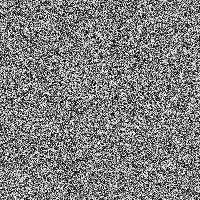

In [58]:
#image from numpy array
import numpy as np
from PIL import Image

#ptp preserves the data type of the array. This means the return value 
#for an input of signed integers with n bits (e.g. np. int8, np. int16, etc) 
#is also a signed integer with n bits
def display_image(x):
    x_scaled = np.uint8(255 * (x - x.min()) / x.ptp())
    return Image.fromarray(x_scaled)

display_image(np.random.rand(200, 200))

In [15]:
#filters!!!!!
#BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE, EMBOSS, 
#FIND_EDGES, SHARPEN, SMOOTH, SMOOTH_MORE

from PIL import Image, ImageFilter
import sys

try:
    img = Image.open('ozu2.png')
    
except IOError:
    print("Unable to load image")    
    sys.exit(1)

blurred = img.filter(ImageFilter.BLUR)
blurred.show()
blurred.save("blurred.png")

In [30]:
#reading an image from internet & save it
from PIL import Image
import sys
import urllib

#Ozyegin EE dept.
url = 'https://www.ozyegin.edu.tr/sites/default/files/styles/slider_870x425/public/_bom9209_final_ee_ana_sayfa.jpg'

try:
    resp = urllib.request.urlopen(url)
except requests.exceptions.RequestException as e:  
    sys.exit(1)

try:
    img = Image.open(resp)
except IOError:
    print("Unable to open image")
    sys.exit(1)
img.show();
img.save('ozu_ee.png', 'png', resolution=600) 